In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_json('ultimate_data_challenge.json')

df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Cleaning

In [4]:
#reading dates as datetime objects
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# making target variable
df['active'] = [1 if lt - su > dt.timedelta(days=30*5) else 0 for lt,su in zip(df['last_trip_date'],df['signup_date'])]

In [5]:
df['active'].value_counts()

0    37802
1    12198
Name: active, dtype: int64

Looks like about a quarter of users are 'active'

In [6]:
df['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

<AxesSubplot: xlabel='avg_rating_of_driver', ylabel='Count'>

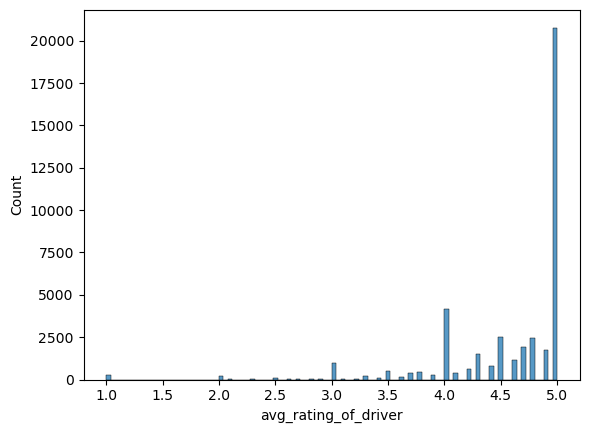

In [7]:
sns.histplot(df['avg_rating_of_driver'])

Because of the null values and this distribution, it makes sense to make this variable categorical

Although, I expect this feature to be a really important one with regards to customer retention, so obscuring some of the information by categorizing it does have its drawbacks

In [8]:
driver_rating_cat = []

for r in df['avg_rating_of_driver']:
    rating = 'no_rating'
    if r == 5:
        rating = 'all 5s'
    elif r < 4:
        rating = 'low average'
    elif r > 4:
        rating = 'high average'
    driver_rating_cat.append(rating)

df['avg_rating_of_driver'] = driver_rating_cat

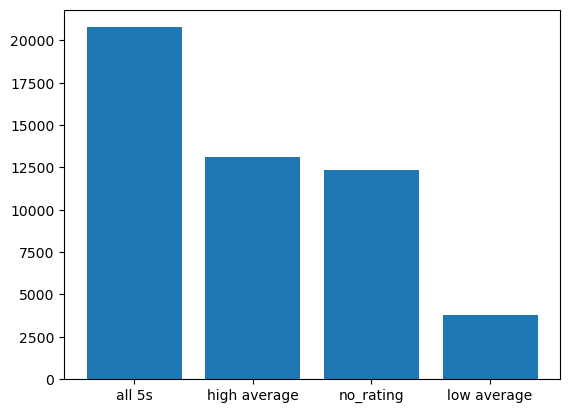

In [9]:
plt.bar(df['avg_rating_of_driver'].value_counts().index,height=df['avg_rating_of_driver'].value_counts());

In [10]:
df['phone'].fillna('unknown/other',inplace=True)
df['phone'].value_counts()

iPhone           34582
Android          15022
unknown/other      396
Name: phone, dtype: int64

In [11]:
df['ultimate_black_user'].value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

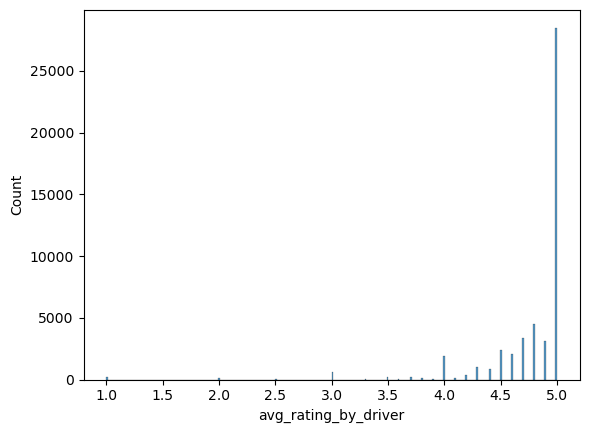

In [12]:
sns.histplot(df['avg_rating_by_driver']);

Similar to *avg_rating_of_driver*, I'm going to categorize this. I suspect that the correlation/mutual information between this feature and its opposite is high 

In [13]:
driver_rating_cat = []

for r in df['avg_rating_by_driver']:
    rating = 'no_rating'
    if r == 5:
        rating = 'all 5s'
    elif r < 4:
        rating = 'low average'
    elif r > 4:
        rating = 'high average'
    driver_rating_cat.append(rating)

df['avg_rating_by_driver'] = driver_rating_cat

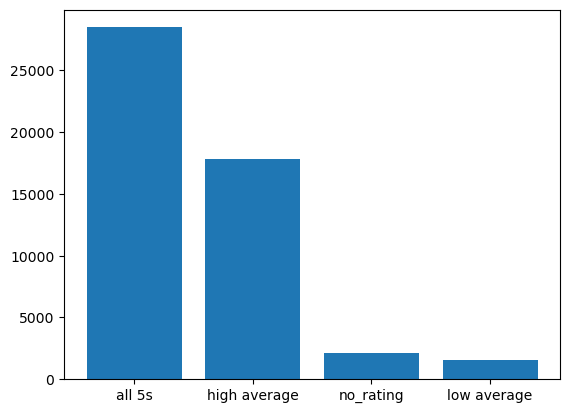

In [14]:
plt.bar(df['avg_rating_by_driver'].value_counts().index,height=df['avg_rating_by_driver'].value_counts());

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(['active','signup_date','last_trip_date'],axis=1).to_numpy()
y = df['active'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [16]:
print('train active%',np.mean(y_train))
print('test active%',np.mean(y_test))

train active% 0.24438805970149255
test active% 0.24309090909090908


In [17]:
df.drop(['active','signup_date','last_trip_date'],axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  object 
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  object 
dtypes: bool(1), float64(4), int64(1), object(4)
memory usage: 3.5+ MB


In [18]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer([('scaler',StandardScaler(),[1,3,5,7,8]),('ohe',OneHotEncoder(drop='first'),[0,2,4,6,9])],remainder='passthrough')

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr = LogisticRegression()
model = Pipeline([('preprocess',preprocess),('lr',lr)])

train auc 0.7872426447697836
test auc 0.7871942018525042


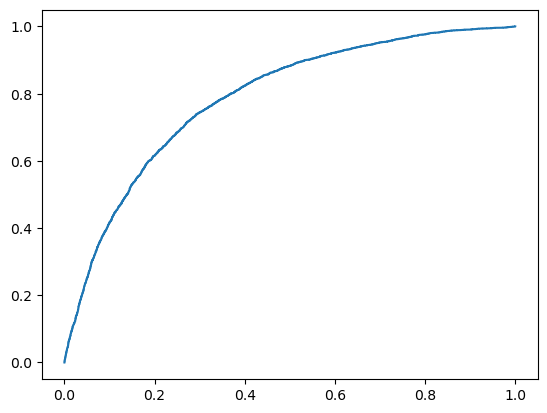

In [20]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
model.fit(X_train,y_train)

train_yhat = model.decision_function(X_train)
test_yhat = model.decision_function(X_test)
train_labels = model.predict(X_train)
test_labels = model.predict(X_test)

print('train auc',roc_auc_score(y_train,train_yhat))
print('test auc',roc_auc_score(y_test,test_yhat))

fpr,tpr,thresholds = roc_curve(y_test,test_yhat)

plt.plot(fpr,tpr);

In [21]:
print(classification_report(y_test,test_labels))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     12489
           1       0.60      0.33      0.42      4011

    accuracy                           0.78     16500
   macro avg       0.71      0.63      0.65     16500
weighted avg       0.76      0.78      0.76     16500



Based on results, I'll try undersampling

In [22]:
uX_train = []
uy_train = []
for x,y in zip(X_train,y_train):
    if y == 1 or np.random.randn() > 0.7:
        uX_train.append(x)
        uy_train.append(y)
X_train = np.array(uX_train)
y_train = np.array(uy_train)

train auc 0.7924011270730433
test auc 0.7872330493017851


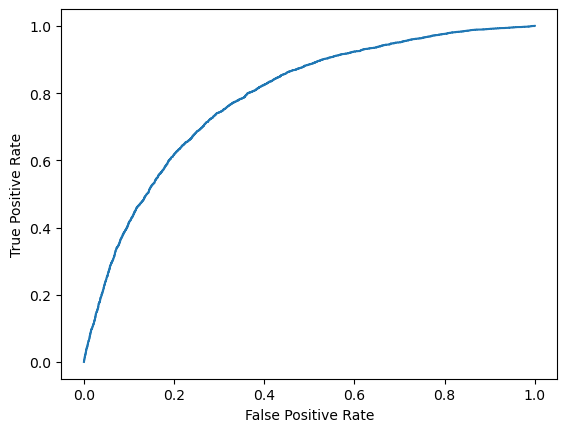

In [23]:
model.fit(X_train,y_train)

train_yhat = model.decision_function(X_train)
test_yhat = model.decision_function(X_test)
train_labels = model.predict(X_train)
test_labels = model.predict(X_test)

print('train auc',roc_auc_score(y_train,train_yhat))
print('test auc',roc_auc_score(y_test,test_yhat))

fpr,tpr,thresholds = roc_curve(y_test,test_yhat)


plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [24]:
print(classification_report(y_test,test_labels))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75     12489
           1       0.41      0.80      0.55      4011

    accuracy                           0.68     16500
   macro avg       0.66      0.72      0.65     16500
weighted avg       0.79      0.68      0.70     16500



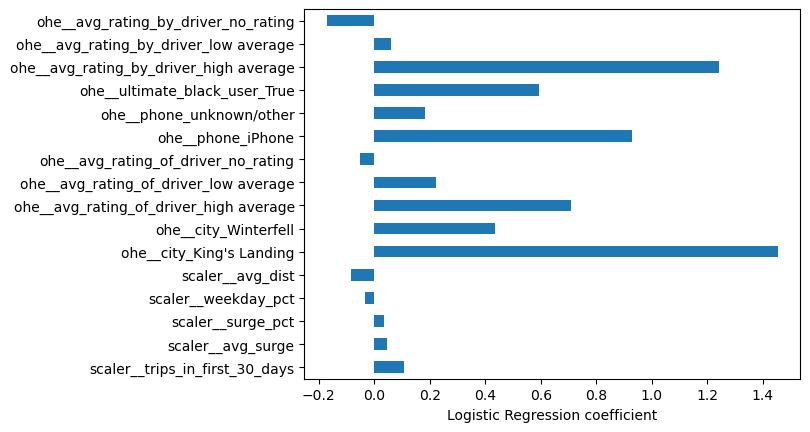

In [41]:
pd.Series(model['lr'].coef_[0],index=model['preprocess'].get_feature_names_out(df.drop(['active','last_trip_date','signup_date'],axis=1).columns)).plot(kind='barh')
plt.xlabel('Logistic Regression coefficient');

In [44]:
model['lr'].intercept_

array([-1.95442543])

The larger coefficients show factors correlating to active users 

The model coefficients shows areas that need improvement:

- it seems that rider retention is not as strong in Winterfell or Astapor when compared to King's Landing 
- android users also seem to be less likely to be active, so it could warrant looking into whether the android app is not as good as the iPhone version
-  Although ultimate black users are more likely to be active, you would expect their retention rate to be higher than expected. According to this model, a regular user in Kings landing will take more trips than an ultimate black user elsewhere.

*Note: I didn't look into the multi-collinearity of this model which can have a huge affect on coefficients but these insights are mostly to demonstrate how this type of model could be useful.* 

In [45]:
df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64